# Results

This section presents the results of the evaluation and analysis of the OCR models. The results are divided into several subsections, including a comparison of baseline and fine-tuned models, visualization of metrics, and detailed error analysis.

In [72]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Load Evaluation Data

In [73]:
# Define paths
DATA_DIR = "../eval_output"
BASELINE_SUMMARY_PATH = os.path.join(DATA_DIR, "evaluation_results_baseline_summary.json")
FINETUNED_SUMMARY_PATH = os.path.join(DATA_DIR, "evaluation_results_finetuned_summary.json")
BASELINE_CSV_PATH = os.path.join(DATA_DIR, "evaluation_results_baseline.csv")
FINETUNED_CSV_PATH = os.path.join(DATA_DIR, "evaluation_results_finetuned.csv")

# Load Summaries
with open(BASELINE_SUMMARY_PATH, 'r') as f:
    baseline_summary = json.load(f)

with open(FINETUNED_SUMMARY_PATH, 'r') as f:
    finetuned_summary = json.load(f)

# Load Detailed Results
baseline_df = pd.read_csv(BASELINE_CSV_PATH)
finetuned_df = pd.read_csv(FINETUNED_CSV_PATH)

print("Baseline Summary:", baseline_summary)
print("Fine-tuned Summary:", finetuned_summary)

Baseline Summary: {'model_type': 'baseline', 'overall_cer': 2.267280163599182, 'total_samples': 2881, 'exact_matches': 63, 'accuracy': -1.2672801635991822, 'mean_cer': 3.109337035751475, 'median_cer': 1.0, 'std_cer': 34.39088909729285}
Fine-tuned Summary: {'model_type': 'finetuned', 'overall_cer': 0.1074642126789366, 'total_samples': 2881, 'exact_matches': 2296, 'accuracy': 0.8925357873210634, 'mean_cer': 0.11619807937058892, 'median_cer': 0.0, 'std_cer': 0.2695334168895878}


## Compare Summary Metrics

In [74]:
# Create comparison DataFrame
metrics = [
    ('overall_cer', 'CER'),
    ('accuracy', 'Accuracy'),
    ('exact_matches', 'Exact Matches')
]
comparison_data = {
    'Metric': [],
    'Model': [],
    'Value': []
}

for metric_key, metric_label in metrics:
    if metric_key in baseline_summary:
        comparison_data['Metric'].append(metric_label)
        comparison_data['Model'].append('Baseline')
        comparison_data['Value'].append(baseline_summary[metric_key])
        
        comparison_data['Metric'].append(metric_label)
        comparison_data['Model'].append('Fine-tuned')
        comparison_data['Value'].append(finetuned_summary[metric_key])

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df.pivot(index='Metric', columns='Model', values='Value'))

Model,Baseline,Fine-tuned
Metric,,
Accuracy,-1.26728,0.892536
CER,2.26728,0.107464
Exact Matches,63.00000,2296.000000


## Visualize Metric Comparison

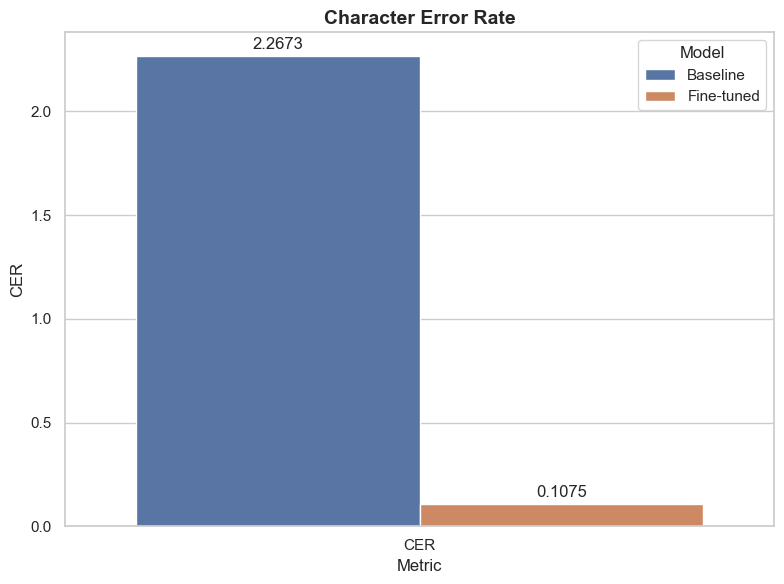

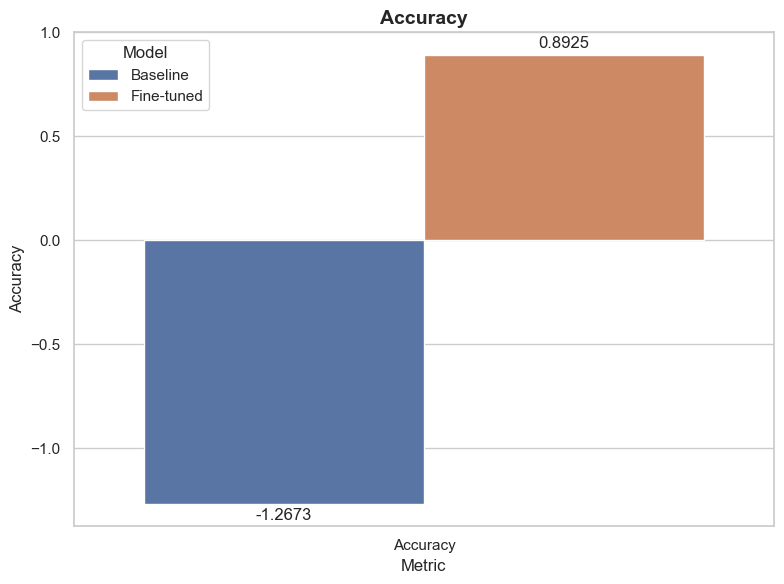

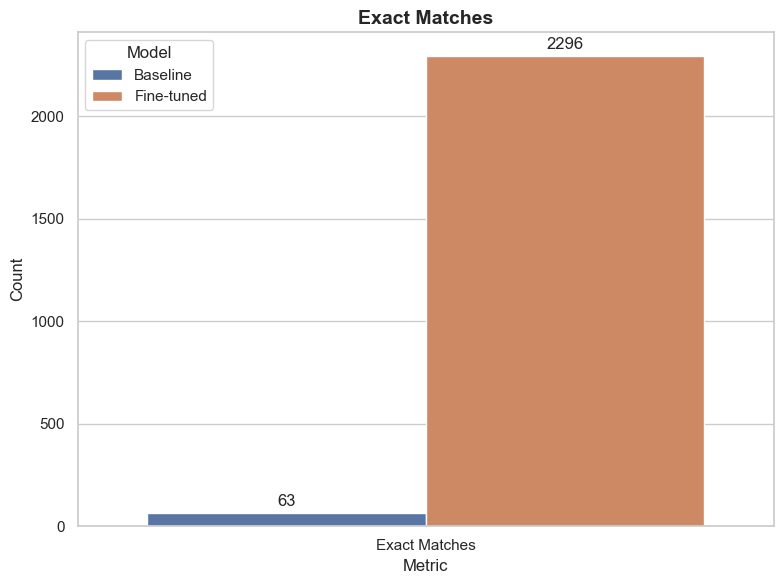

In [75]:
# CER Plot
plt.figure(figsize=(8, 6))
cer_data = comparison_df[comparison_df['Metric'] == 'CER']
ax = sns.barplot(data=cer_data, x='Metric', y='Value', hue='Model')
plt.title('Character Error Rate', fontsize=14, fontweight='bold')
plt.ylabel('CER')
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', padding=3)
plt.tight_layout()
plt.show()

# Accuracy Plot
plt.figure(figsize=(8, 6))
acc_data = comparison_df[comparison_df['Metric'] == 'Accuracy']
ax = sns.barplot(data=acc_data, x='Metric', y='Value', hue='Model')
plt.title('Accuracy', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', padding=3)
plt.tight_layout()
plt.show()

# Exact Matches Plot
plt.figure(figsize=(8, 6))
em_data = comparison_df[comparison_df['Metric'] == 'Exact Matches']
ax = sns.barplot(data=em_data, x='Metric', y='Value', hue='Model')
plt.title('Exact Matches', fontsize=14, fontweight='bold')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.tight_layout()
plt.show()

## Improvement Analysis

In [76]:
# Calculate improvement
cer_improvement = (baseline_summary['overall_cer'] - finetuned_summary['overall_cer']) / baseline_summary['overall_cer'] * 100
acc_improvement = (finetuned_summary['accuracy'] - baseline_summary['accuracy']) / abs(baseline_summary['accuracy']) * 100

print(f"CER Reduction: {cer_improvement:.2f}%")
print(f"Accuracy Improvement: {acc_improvement:.2f}%")

CER Reduction: 95.26%
Accuracy Improvement: 170.43%


## Training Loss Curve

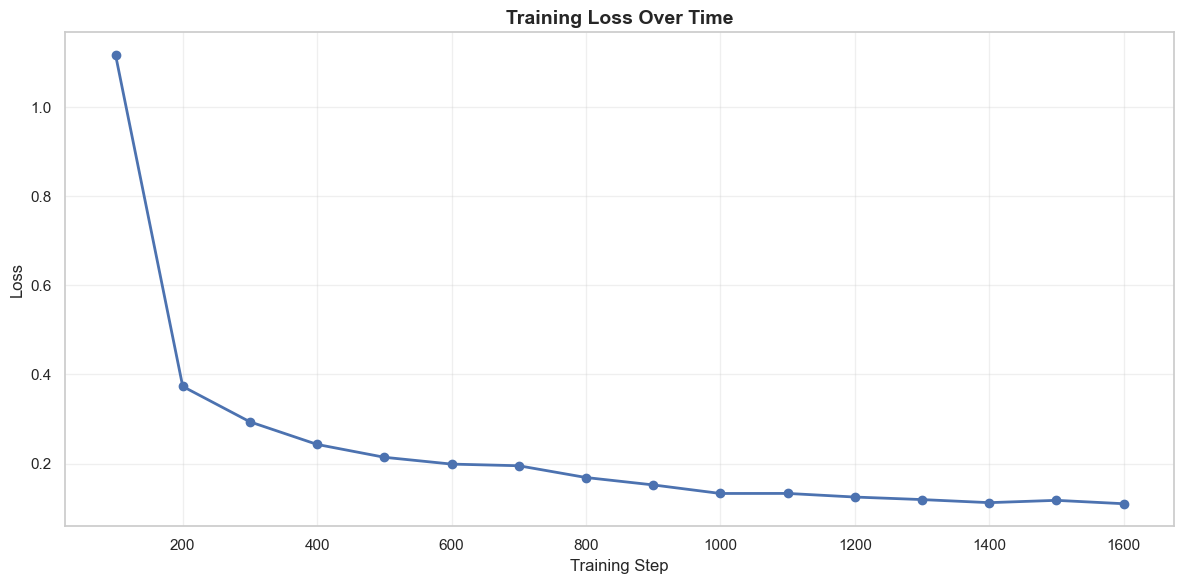

Initial Loss: 1.1172
Final Loss: 0.1101
Loss Reduction: 90.15%


In [77]:
# Training loss data
training_data = {
    'Step': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600],
    'Training Loss': [1.117200, 0.373200, 0.293800, 0.243100, 0.214300, 0.199000, 0.195300, 
                      0.168900, 0.152300, 0.133100, 0.133200, 0.125100, 0.119400, 0.112500, 
                      0.117700, 0.110100]
}

training_df = pd.DataFrame(training_data)

# Plot training loss
plt.figure(figsize=(12, 6))
plt.plot(training_df['Step'], training_df['Training Loss'], marker='o', linewidth=2, markersize=6)
plt.title('Training Loss Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Training Step', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display training statistics
print(f"Initial Loss: {training_df['Training Loss'].iloc[0]:.4f}")
print(f"Final Loss: {training_df['Training Loss'].iloc[-1]:.4f}")
print(f"Loss Reduction: {(training_df['Training Loss'].iloc[0] - training_df['Training Loss'].iloc[-1]) / training_df['Training Loss'].iloc[0] * 100:.2f}%")

## Sample Predictions Comparison

SAMPLE PREDICTIONS: Fine-tuned Correct vs Baseline Wrong


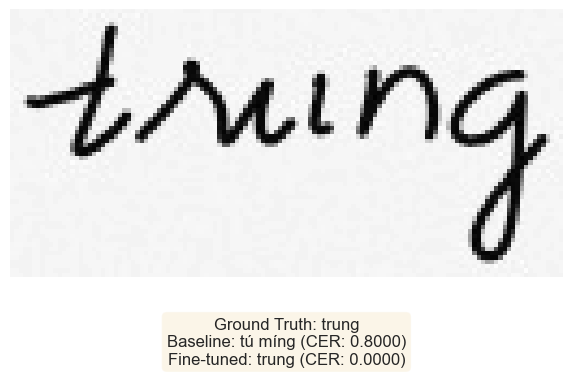

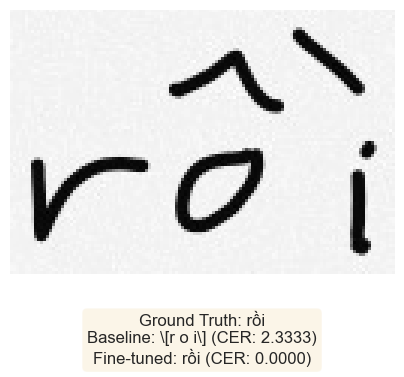

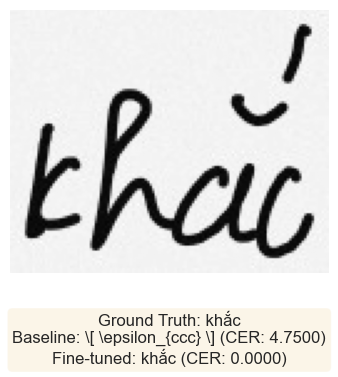


Total samples where fine-tuned is correct but baseline is wrong: 2237


In [78]:
# Find samples where fine-tuned is correct but baseline is wrong
merged_df = baseline_df.merge(
    finetuned_df, 
    on=['image_path', 'ground_truth'], 
    suffixes=('_baseline', '_finetuned')
)

# Filter: fine-tuned correct (cer=0), baseline wrong (cer>0)
correct_finetuned = merged_df[
    (merged_df['cer_finetuned'] == 0) & 
    (merged_df['cer_baseline'] > 0)
].copy()

# Select 3 random samples
import random
from PIL import Image

random.seed(42)
sample_indices = random.sample(range(len(correct_finetuned)), min(3, len(correct_finetuned)))
samples = correct_finetuned.iloc[sample_indices]

# Display each sample separately
print("=" * 100)
print("SAMPLE PREDICTIONS: Fine-tuned Correct vs Baseline Wrong")
print("=" * 100)

for i, (idx, row) in enumerate(samples.iterrows()):
    # Update path to local data directory
    image_path = row['image_path'].replace('/kaggle/input/uit-hwdb-word/UIT_HWDB_word/', '../data/UIT_HWDB_word/')
    
    # Display image
    plt.figure(figsize=(10, 4))
    
    try:
        img = Image.open(image_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        # plt.title(f"Sample {i+1}", fontsize=14, fontweight='bold', pad=20)
        
        # Add text information below image
        info_text = f"Ground Truth: {row['ground_truth']}\n"
        info_text += f"Baseline: {row['prediction_baseline']} (CER: {row['cer_baseline']:.4f})\n"
        info_text += f"Fine-tuned: {row['prediction_finetuned']} (CER: {row['cer_finetuned']:.4f})"
        
        plt.text(0.5, -0.15, info_text, 
                ha='center', va='top', 
                transform=plt.gca().transAxes,
                fontsize=12,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
        
    except Exception as e:
        plt.text(0.5, 0.5, f"Image not found", ha='center', va='center', fontsize=14)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    

print(f"\nTotal samples where fine-tuned is correct but baseline is wrong: {len(correct_finetuned)}")

## Fine-tuned Model Errors Analysis

FINE-TUNED MODEL ERRORS: Samples with Wrong Predictions


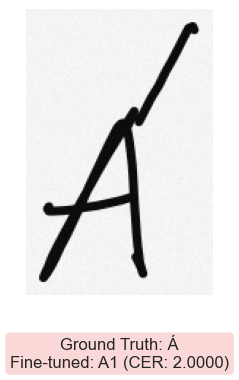

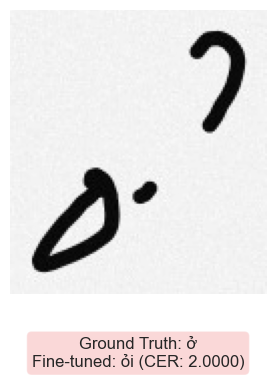

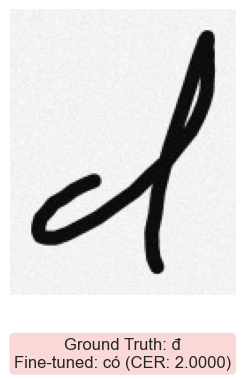

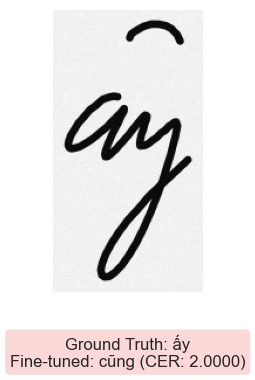

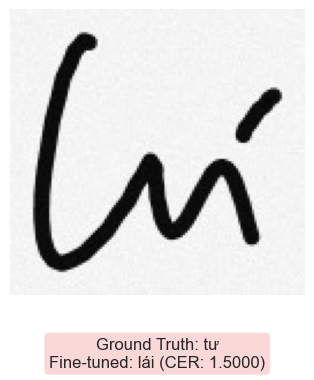

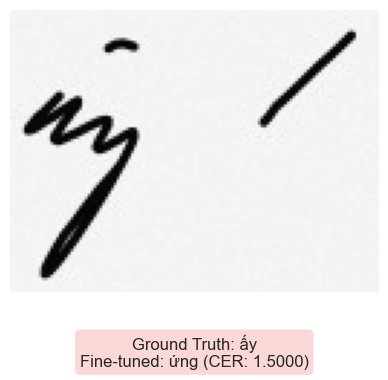

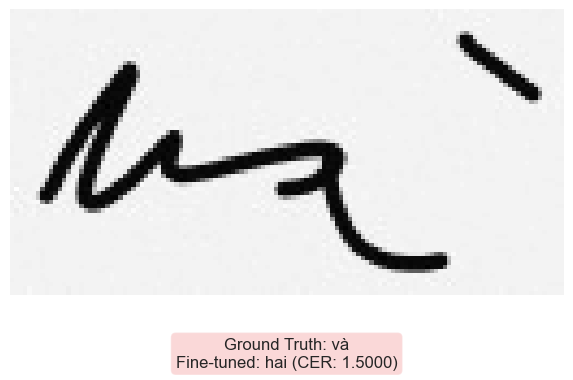

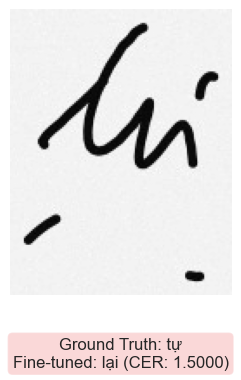

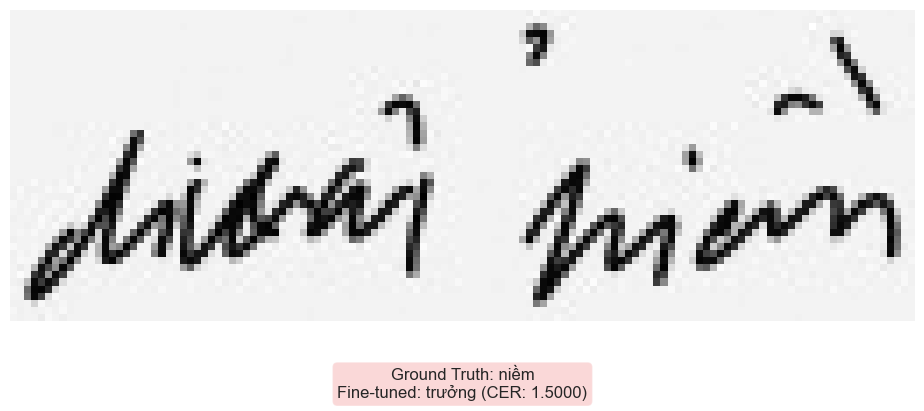

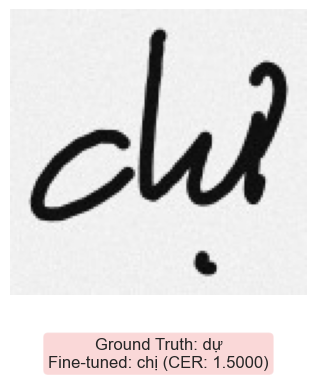

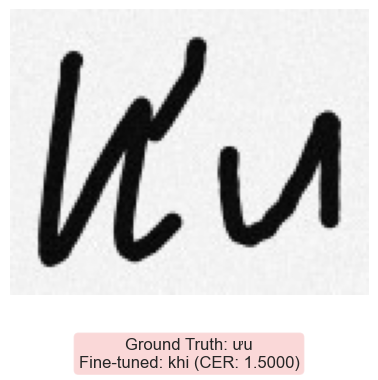

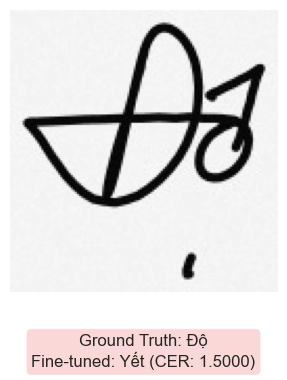

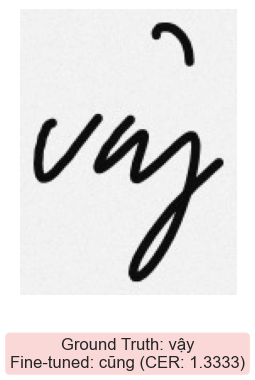

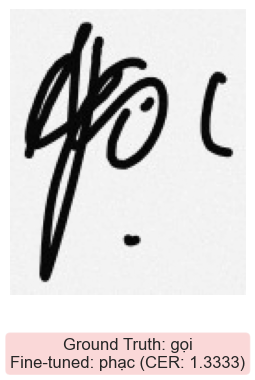

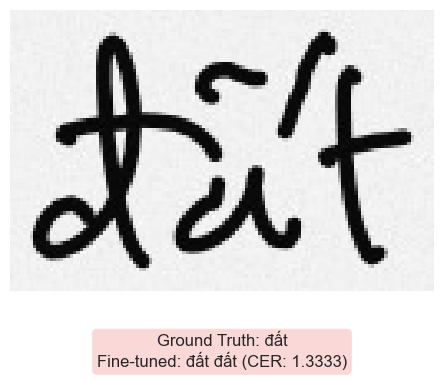

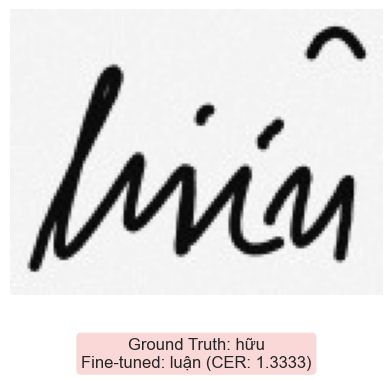

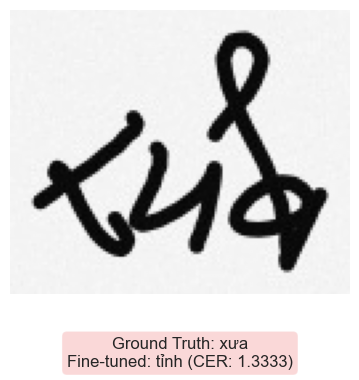

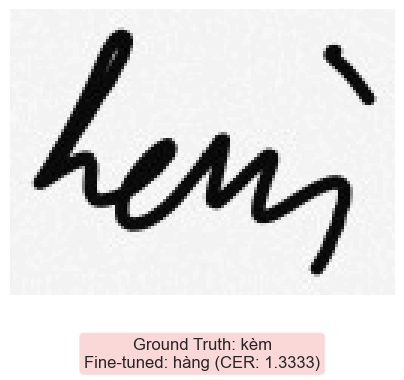

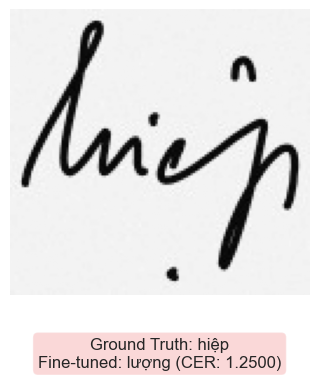

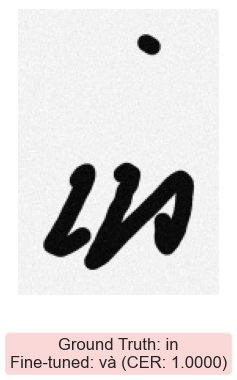


Total samples where fine-tuned is wrong: 585
Mean CER on wrong predictions: 0.5723
Median CER on wrong predictions: 0.5000


In [80]:
# Find samples where fine-tuned is wrong (cer > 0)
wrong_finetuned = merged_df[merged_df['cer_finetuned'] > 0].copy()

# Sort by CER to see the worst predictions
wrong_finetuned_sorted = wrong_finetuned.sort_values('cer_finetuned', ascending=False)

# Select 3 samples with highest CER
samples_wrong = wrong_finetuned_sorted.head(20)

# Display each sample separately
print("=" * 100)
print("FINE-TUNED MODEL ERRORS: Samples with Wrong Predictions")
print("=" * 100)

for i, (idx, row) in enumerate(samples_wrong.iterrows()):
    # Update path to local data directory
    image_path = row['image_path'].replace('/kaggle/input/uit-hwdb-word/UIT_HWDB_word/', '../data/UIT_HWDB_word/')
    
    # Display image
    plt.figure(figsize=(10, 4))
    
    try:
        img = Image.open(image_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        
        # Add text information below image
        info_text = f"Ground Truth: {row['ground_truth']}\n"
        info_text += f"Fine-tuned: {row['prediction_finetuned']} (CER: {row['cer_finetuned']:.4f})"
        
        plt.text(0.5, -0.15, info_text, 
                ha='center', va='top', 
                transform=plt.gca().transAxes,
                fontsize=12,
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.3))
        
    except Exception as e:
        plt.text(0.5, 0.5, f"Image not found", ha='center', va='center', fontsize=14)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

print(f"\nTotal samples where fine-tuned is wrong: {len(wrong_finetuned)}")
print(f"Mean CER on wrong predictions: {wrong_finetuned['cer_finetuned'].mean():.4f}")
print(f"Median CER on wrong predictions: {wrong_finetuned['cer_finetuned'].median():.4f}")